# Variational Quantum Eigensolver Algorithm

VQE significantly enhances the efficiency of finding the ground state energy of a Hamiltonian

1. [Overview](#1.-Introduction)
2. [VQE Algorithm](#1.-Introduction)
3. [Qiskit Implementation](#3.-Quantum-Fourier-Transform)
4. [Circuit Construction](#4.-Circuit-Construction)
5. [Execution](#5.-Execution)
6. [Post Processing](#6.-Post-Processing)

## 1. Overview

#### Problem Statement

This problem involves finding the minimum eigenvalue (ground state energy) of a given Hamiltonian efficiently.
Classically, diagonalizing large Hamiltonians is computationally expensive. VQE leverages quantum computing
and classical optimization to approximate the ground state energy.

Given a parameterized Hamiltonian $H(x)$, the goal is to estimate its lowest eigenvalue $\lambda$.


Executing a VQE algorithm requires the following components:

1. Hamiltonian and ansatz (problem specification)
2. Qiskit Runtime estimator
3. Classical optimizer


### Ansatz


### Cost Fuction
It is the cost function that the VQE minimizes to find the group state energy to find the most optimal quantum state.
$$
E(\theta) = \ket{{\psi(\theta)}H{\psi}(\theta)}
$$

$E(\theta)$ represents the expected energy of the quantum state ${\psi(\theta)}$

H is the Hamiltonian matrix

${\psi(\theta)} $ is the parametricized ansatz


# 3. Qiskit Implementation

#### 3.1 Imports

In [ ]:
%pip install numpy
%pip install qiskit
%pip install qiskit_ibm_runtime
%pip install qiskit_aer
%pip install qiskit[visualization]

In [7]:
# General imports
import numpy as np

# # Pre-defined ansatz circuit and operator class for Hamiltonian
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

# from qiskit_algorithms.minimum_eigensolvers import VQE
# from qiskit.primitives import Estimator
    
# from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP, P_BFGS, SPSA, QNSPSA, BOBYQA
# from qiskit_algorithms.utils import algorithm_globals
# # from qiskit.primitives import Estimator, BaseEstimatorV2
# from qiskit_ibm_runtime import SamplerV2, EstimatorV2
# from qiskit_ibm_runtime import Session

In [ ]:
# runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)

In [ ]:
ansatz = EfficientSU2(hamiltonian.num_qubits)
ansatz.decompose().draw("mpl", style="iqp")

<img src="VQE_images/VQE_circuit.png">

### Example Hamiltonian 

In [3]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp

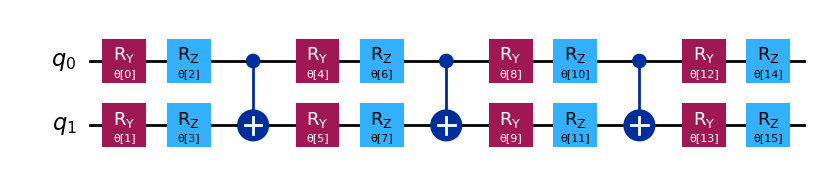

In [5]:
# Example Hamiltonian: H = Z ⊗ I + I ⊗ Z + 0.5 * X ⊗ X
hamiltonian = SparsePauliOp(["ZI", "IZ", "XX"], coeffs=[1.0, 1.0, 0.5])

ansatz = EfficientSU2(hamiltonian.num_qubits)
ansatz.decompose().draw("mpl", style="iqp")

In [ ]:
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA

estimator = Estimator()
optimizer = COBYLA()

vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=optimizer)
result = vqe.compute_minimum_eigenvalue(operator=H)


#### Cost function

In [ ]:
vqe = VQE(estimatorV, vAnsatz, optimizer, callback=store_intermediate_result)
result = vqe.compute_minimum_eigenvalue(operator=qubitOp)


## 5. Execution

In [ ]:
with Session(backend=backend) as session:
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 10000

    res = minimize(
        cost_func,
        x0,
        args=(ansatz_isa, hamiltonian_isa, estimator),
        method="cobyla",
    )

## 6. Post-Processing

In [ ]:

from qiskit import Aer
from qiskit.circuit.library import TwoLocal
from qiskit.opflow import PauliSumOp
from qiskit.utils import QuantumInstance
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA
import matplotlib.pyplot as plt

# -----------------------------
# A. Construct the Hamiltonian
# -----------------------------
hamiltonian = PauliSumOp.from_list([
    ("Z", 1.0),     # Z ⊗ I
    ("IZ", 0.5),    # I ⊗ Z
    ("ZZ", 0.3)     # Z ⊗ Z
])

# -----------------------------
# B. Build the Ansatz
# -----------------------------
ansatz = TwoLocal(num_qubits=2,
                  rotation_blocks='ry',
                  entanglement_blocks='cz',
                  reps=2,
                  insert_barriers=True)

# -----------------------------
# C. Choose Optimizer
# -----------------------------
optimizer = COBYLA(maxiter=100)

# -----------------------------
# D. Backend Setup
# -----------------------------
backend = Aer.get_backend('aer_simulator_statevector')
quantum_instance = QuantumInstance(backend=backend, shots=1024)

# -----------------------------
# E. Define Callback for Iteration Tracking
# -----------------------------
energies = []

def store_intermediate_result(eval_count, parameters, mean, std):
    energies.append(mean)
    print(f"Iteration {eval_count}: Energy = {mean:.6f}")

# -----------------------------
# F. Run VQE with Callback
# -----------------------------
vqe = VQE(ansatz=ansatz,
          optimizer=optimizer,
          quantum_instance=quantum_instance,
          callback=store_intermediate_result)

result = vqe.compute_minimum_eigenvalue(operator=hamiltonian)

# ============================================================
# Post-Processing and Plotting
# ============================================================

print("\nFinal Estimated Ground State Energy:", result.eigenvalue.real)
print("Optimal Parameters (θ):", result.optimal_point)

# Plot energy convergence
plt.figure(figsize=(10, 6))
plt.plot(range(len(energies)), energies, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.title("VQE Convergence Over Iterations")
plt.grid(True)
plt.tight_layout()
plt.show()